<a href="https://colab.research.google.com/github/garrettfenchel/Predicting-Poverty-HH-data-/blob/main/Predicting_Poverty_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Data Import


In [1]:
pip install -U matplotlib 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [168]:
poverty_original = pd.read_excel("/content/drive/MyDrive/Work/Unilever/Data Science/Project 2/Poverty Data.xlsx")


In [297]:
poverty = poverty_original
poverty

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
0,0,C,False,18.0,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,1,0.515
1,1,C,True,30.0,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,0,0.981
2,2,A,False,20.0,True,True,Q,Spouse,1.0,True,...,False,False,False,False,False,False,0,0,0,0.982
3,3,A,False,61.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,0,0,0,0.879
4,4,D,False,26.0,True,True,X,Spouse,1.0,True,...,False,False,False,False,False,False,1,0,3,0.796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,12595,C,True,50.0,False,True,P,Head,1.0,True,...,True,False,False,False,False,False,2,0,1,0.990
12596,12596,D,False,90.0,False,False,O,Head,0.0,True,...,False,False,False,False,False,False,0,0,0,0.950
12597,12597,J,False,52.0,True,False,X,Head,1.0,False,...,True,False,False,False,True,False,0,1,0,0.342
12598,12598,I,False,40.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,0,0,0,0.846


In [6]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   row_id                                 12600 non-null  int64  
 1   country                                12600 non-null  object 
 2   is_urban                               12600 non-null  bool   
 3   age                                    12600 non-null  float64
 4   female                                 12600 non-null  bool   
 5   married                                12600 non-null  bool   
 6   religion                               12600 non-null  object 
 7   relationship_to_hh_head                12600 non-null  object 
 8   education_level                        12364 non-null  float64
 9   literacy                               12600 non-null  bool   
 10  can_add                                12600 non-null  bool   
 11  ca

# Data Cleanup

In [298]:
#Checking duplicates
poverty[poverty.duplicated()]

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability


In [328]:
poverty = poverty.dropna()

In [299]:
#Checking categorical variables
poverty.value_counts(["employment_type_last_year"])


employment_type_last_year
not_working                  4513
self_employed                3113
irregular_seasonal           2349
salaried                     1960
other                         665
dtype: int64

In [300]:
poverty.describe()

,row_id,age,education_level,share_hh_income_provided,num_times_borrowed_last_year,borrowing_recency,bank_interest_rate,mm_interest_rate,mfi_interest_rate,other_fsp_interest_rate,num_shocks_last_year,avg_shock_strength_last_year,phone_technology,phone_ownership,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
count,12600.000000,12600.000000,12364.000000,12295.000000,12600.000000,12600.000000,289.000000,151.000000,201.000000,239.000000,12600.000000,1.260000e+04,12600.00000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000
mean,6299.500000,36.280714,1.316241,2.888166,0.657698,0.866429,9.843080,9.021026,10.909204,8.216736,1.100159,5.510582e+14,1.20873,1.468254,0.714127,0.188968,1.559683,0.611272
std,3637.451031,15.145945,0.905442,1.564284,0.924598,0.960866,15.033089,13.620161,10.353298,10.649538,1.190072,3.724530e+15,1.09306,0.776638,0.805878,0.473696,2.043831,0.291476
min,0.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3149.750000,25.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.750000,5.000000,2.250000,0.000000,0.000000e+00,0.00000,1.000000,0.000000,0.000000,0.000000,0.394000
50%,6299.500000,33.000000,1.000000,2.000000,0.000000,0.000000,7.000000,7.000000,10.000000,6.000000,1.000000,2.000000e+00,1.00000,2.000000,1.000000,0.000000,1.000000,0.633000
75%,9449.250000,45.000000,2.000000,5.000000,1.000000,2.000000,14.000000,10.000000,15.000000,10.000000,2.000000,4.000000e+00,2.00000,2.000000,1.000000,0.000000,3.000000,0.879000
max,12599.000000,115.000000,3.000000,5.000000,3.000000,2.000000,100.000000,100.000000,100.000000,100.000000,5.000000,3.666667e+16,3.00000,2.000000,6.000000,4.000000,10.000000,1.000000


In [301]:
poverty = poverty.replace(True,1)
poverty = poverty.replace(False,0)

In [302]:
#Dropping Unknown Relationship
poverty = poverty[poverty['relationship_to_hh_head'] != "Unknown"]

In [303]:
#Create Poverty Boolean
def f_poverty(a):
  if a > .499999:
    return 1 
  else:
    return 0
poverty["poverty_bool"] = np.vectorize(f_poverty)(poverty["poverty_probability"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [304]:
#Combine O and N religion
def f_religion(a):
  if a == "O" or a == "N":
    return "O_N" 
  else:
    return a
poverty["religion_clean"] = np.vectorize(f_religion)(poverty["religion"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [305]:
#Combining Math Skills
def f_math(a,b,c,d):
    return int (a)+b+c+d
poverty["math_skill"] = np.vectorize(f_math)(poverty["can_add"],poverty["can_divide"],poverty["can_calc_percents"],poverty["can_calc_compounding"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [306]:
#Combining Bank Skills
def f_bank(a,b,c,d,e):
    return int (a)+b+c+d+e
poverty["bank_skill"] = np.vectorize(f_bank)(poverty["active_bank_user"],poverty["active_mm_user"],poverty["active_formal_nbfi_user"],poverty["active_informal_nbfi_user"],poverty["nonreg_active_mm_user"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [307]:
#Combining Savings
def f_savings(a,b,c):
    return int (a)+b+c
poverty["savings"] = np.vectorize(f_savings)(poverty["formal_savings"],poverty["informal_savings"],poverty["cash_property_savings"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [308]:
#Age Groups
def f_age(a):
  if a < 18:
    return "15-18"
  elif a < 41:
    return "18-40"
  elif a < 65:
    return "40-60"
  else:
    return "65+"

poverty["age_groups"] = np.vectorize(f_age)(poverty["age"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [309]:
poverty['religion_n'] = pd.factorize(poverty['religion_clean'])[0]
poverty['country_n'] = pd.factorize(poverty['country'])[0]
poverty['relationship_to_hh_head_n'] = pd.factorize(poverty['relationship_to_hh_head'])[0]
poverty['employment_type_last_year_n'] = pd.factorize(poverty['employment_type_last_year'])[0]
poverty['age_groups_n'] = pd.factorize(poverty['age_groups'])[0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

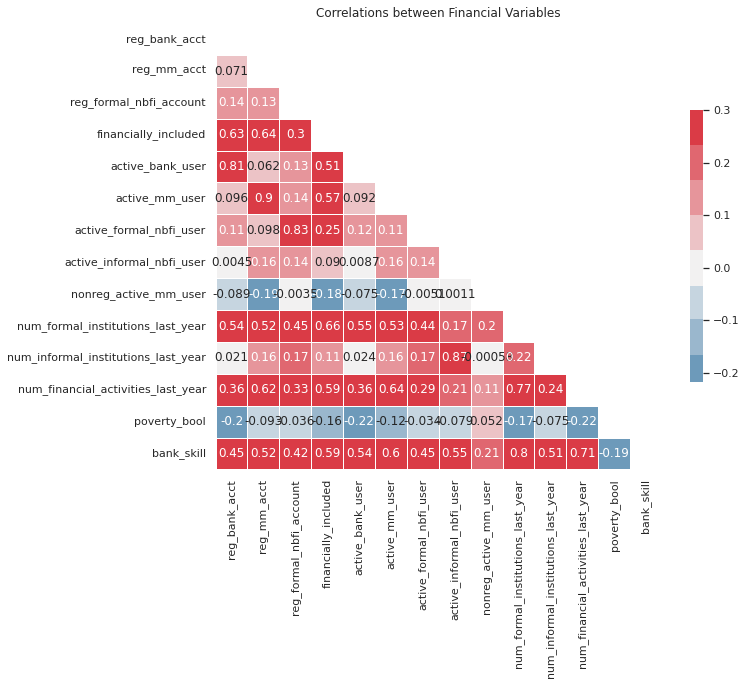

In [310]:
#Comparing which Financial Activities to use
#Choosing Number Financial Activities

compare = poverty[['reg_bank_acct', 'reg_mm_acct',
       'reg_formal_nbfi_account', 'financially_included','active_bank_user',
       'active_mm_user', 'active_formal_nbfi_user',
       'active_informal_nbfi_user', 'nonreg_active_mm_user',
       'num_formal_institutions_last_year',
       'num_informal_institutions_last_year',
       'num_financial_activities_last_year',
       'poverty_bool',"bank_skill"]]

correlation= compare.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(240, 10, n=9)
fig9 = sns.heatmap(correlation, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlations between Financial Variables')

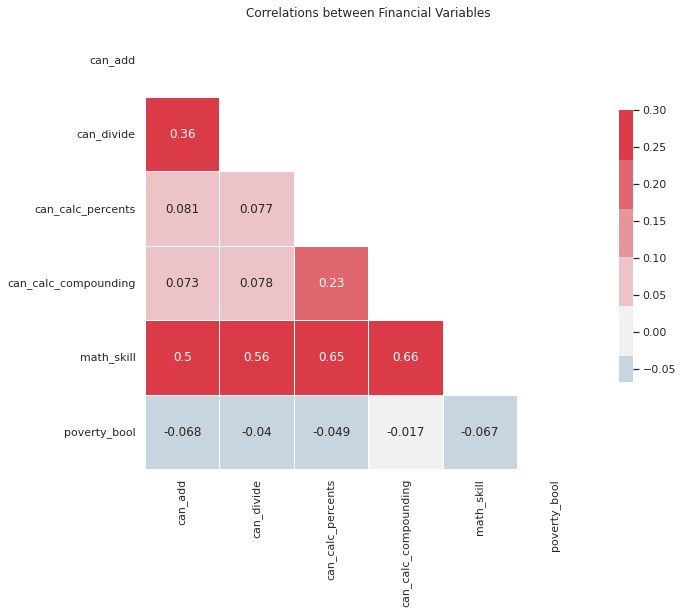

In [311]:
#Comparing which Math Skill to use
#Choosing Math Skill Combined

compare = poverty[['can_add',
       'can_divide', 'can_calc_percents', 'can_calc_compounding',"math_skill","poverty_bool"]]

correlation= compare.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(240, 10, n=9)
fig9 = sns.heatmap(correlation, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlations between Financial Variables')

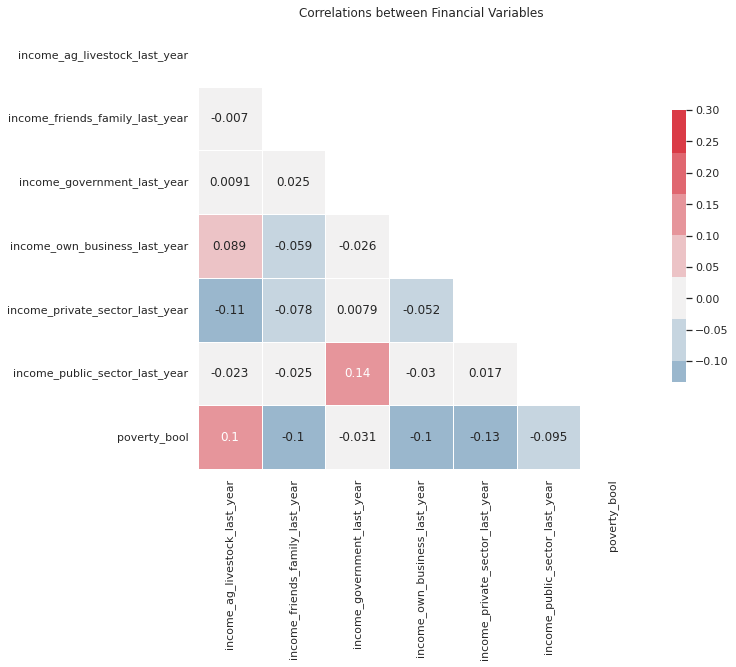

In [312]:
#Comparing Income Sources

compare = poverty[['income_ag_livestock_last_year', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',"poverty_bool"]]

correlation= compare.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(240, 10, n=9)
fig9 = sns.heatmap(correlation, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlations between Financial Variables')

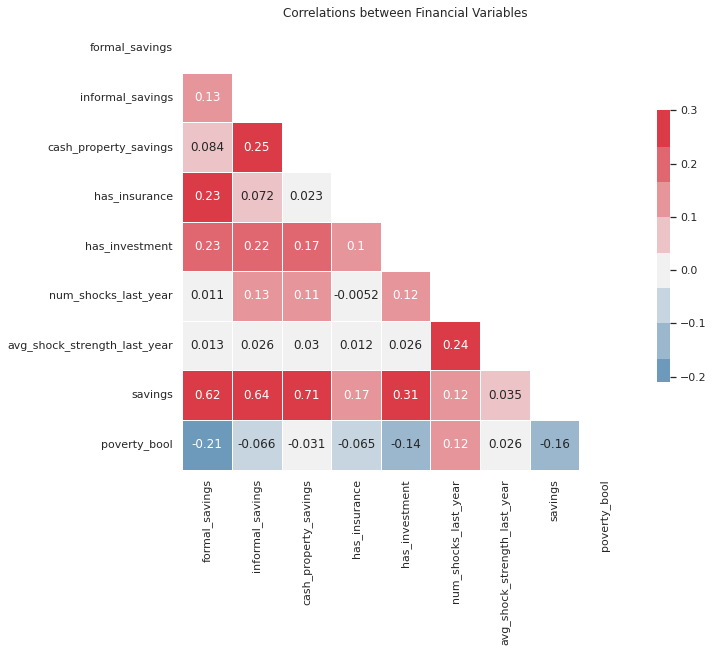

In [313]:
#Comparing Savings

compare = poverty[['formal_savings',
       'informal_savings', 'cash_property_savings', 'has_insurance',
       'has_investment', 'num_shocks_last_year',
       'avg_shock_strength_last_year',"savings","poverty_bool"]]

correlation= compare.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(240, 10, n=9)
fig9 = sns.heatmap(correlation, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlations between Financial Variables')

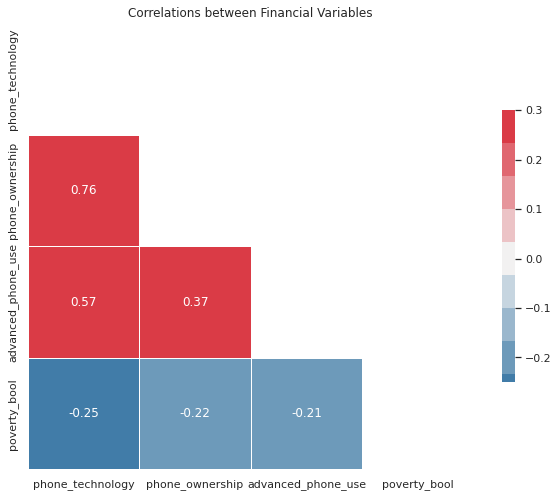

In [314]:
#Comparing Phone

compare = poverty[['phone_technology',
       'phone_ownership', 'advanced_phone_use',"poverty_bool"]]

correlation= compare.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(240, 10, n=9)
fig9 = sns.heatmap(correlation, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlations between Financial Variables')

In [315]:
#Selecting Columns
poverty = poverty[['poverty_bool','country',"country_n", 'is_urban', "age_groups","age_groups_n", 'female', 'married', 'religion_clean', 'religion_n',
       'relationship_to_hh_head', 'relationship_to_hh_head_n', 'education_level','literacy',"employment_type_last_year_n",
       'employment_type_last_year', 'share_hh_income_provided',
       'income_ag_livestock_last_year', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'formal_savings','has_insurance',
       'has_investment', 'num_shocks_last_year','phone_technology', 
       'num_financial_activities_last_year', 'math_skill']]

# Visualizations


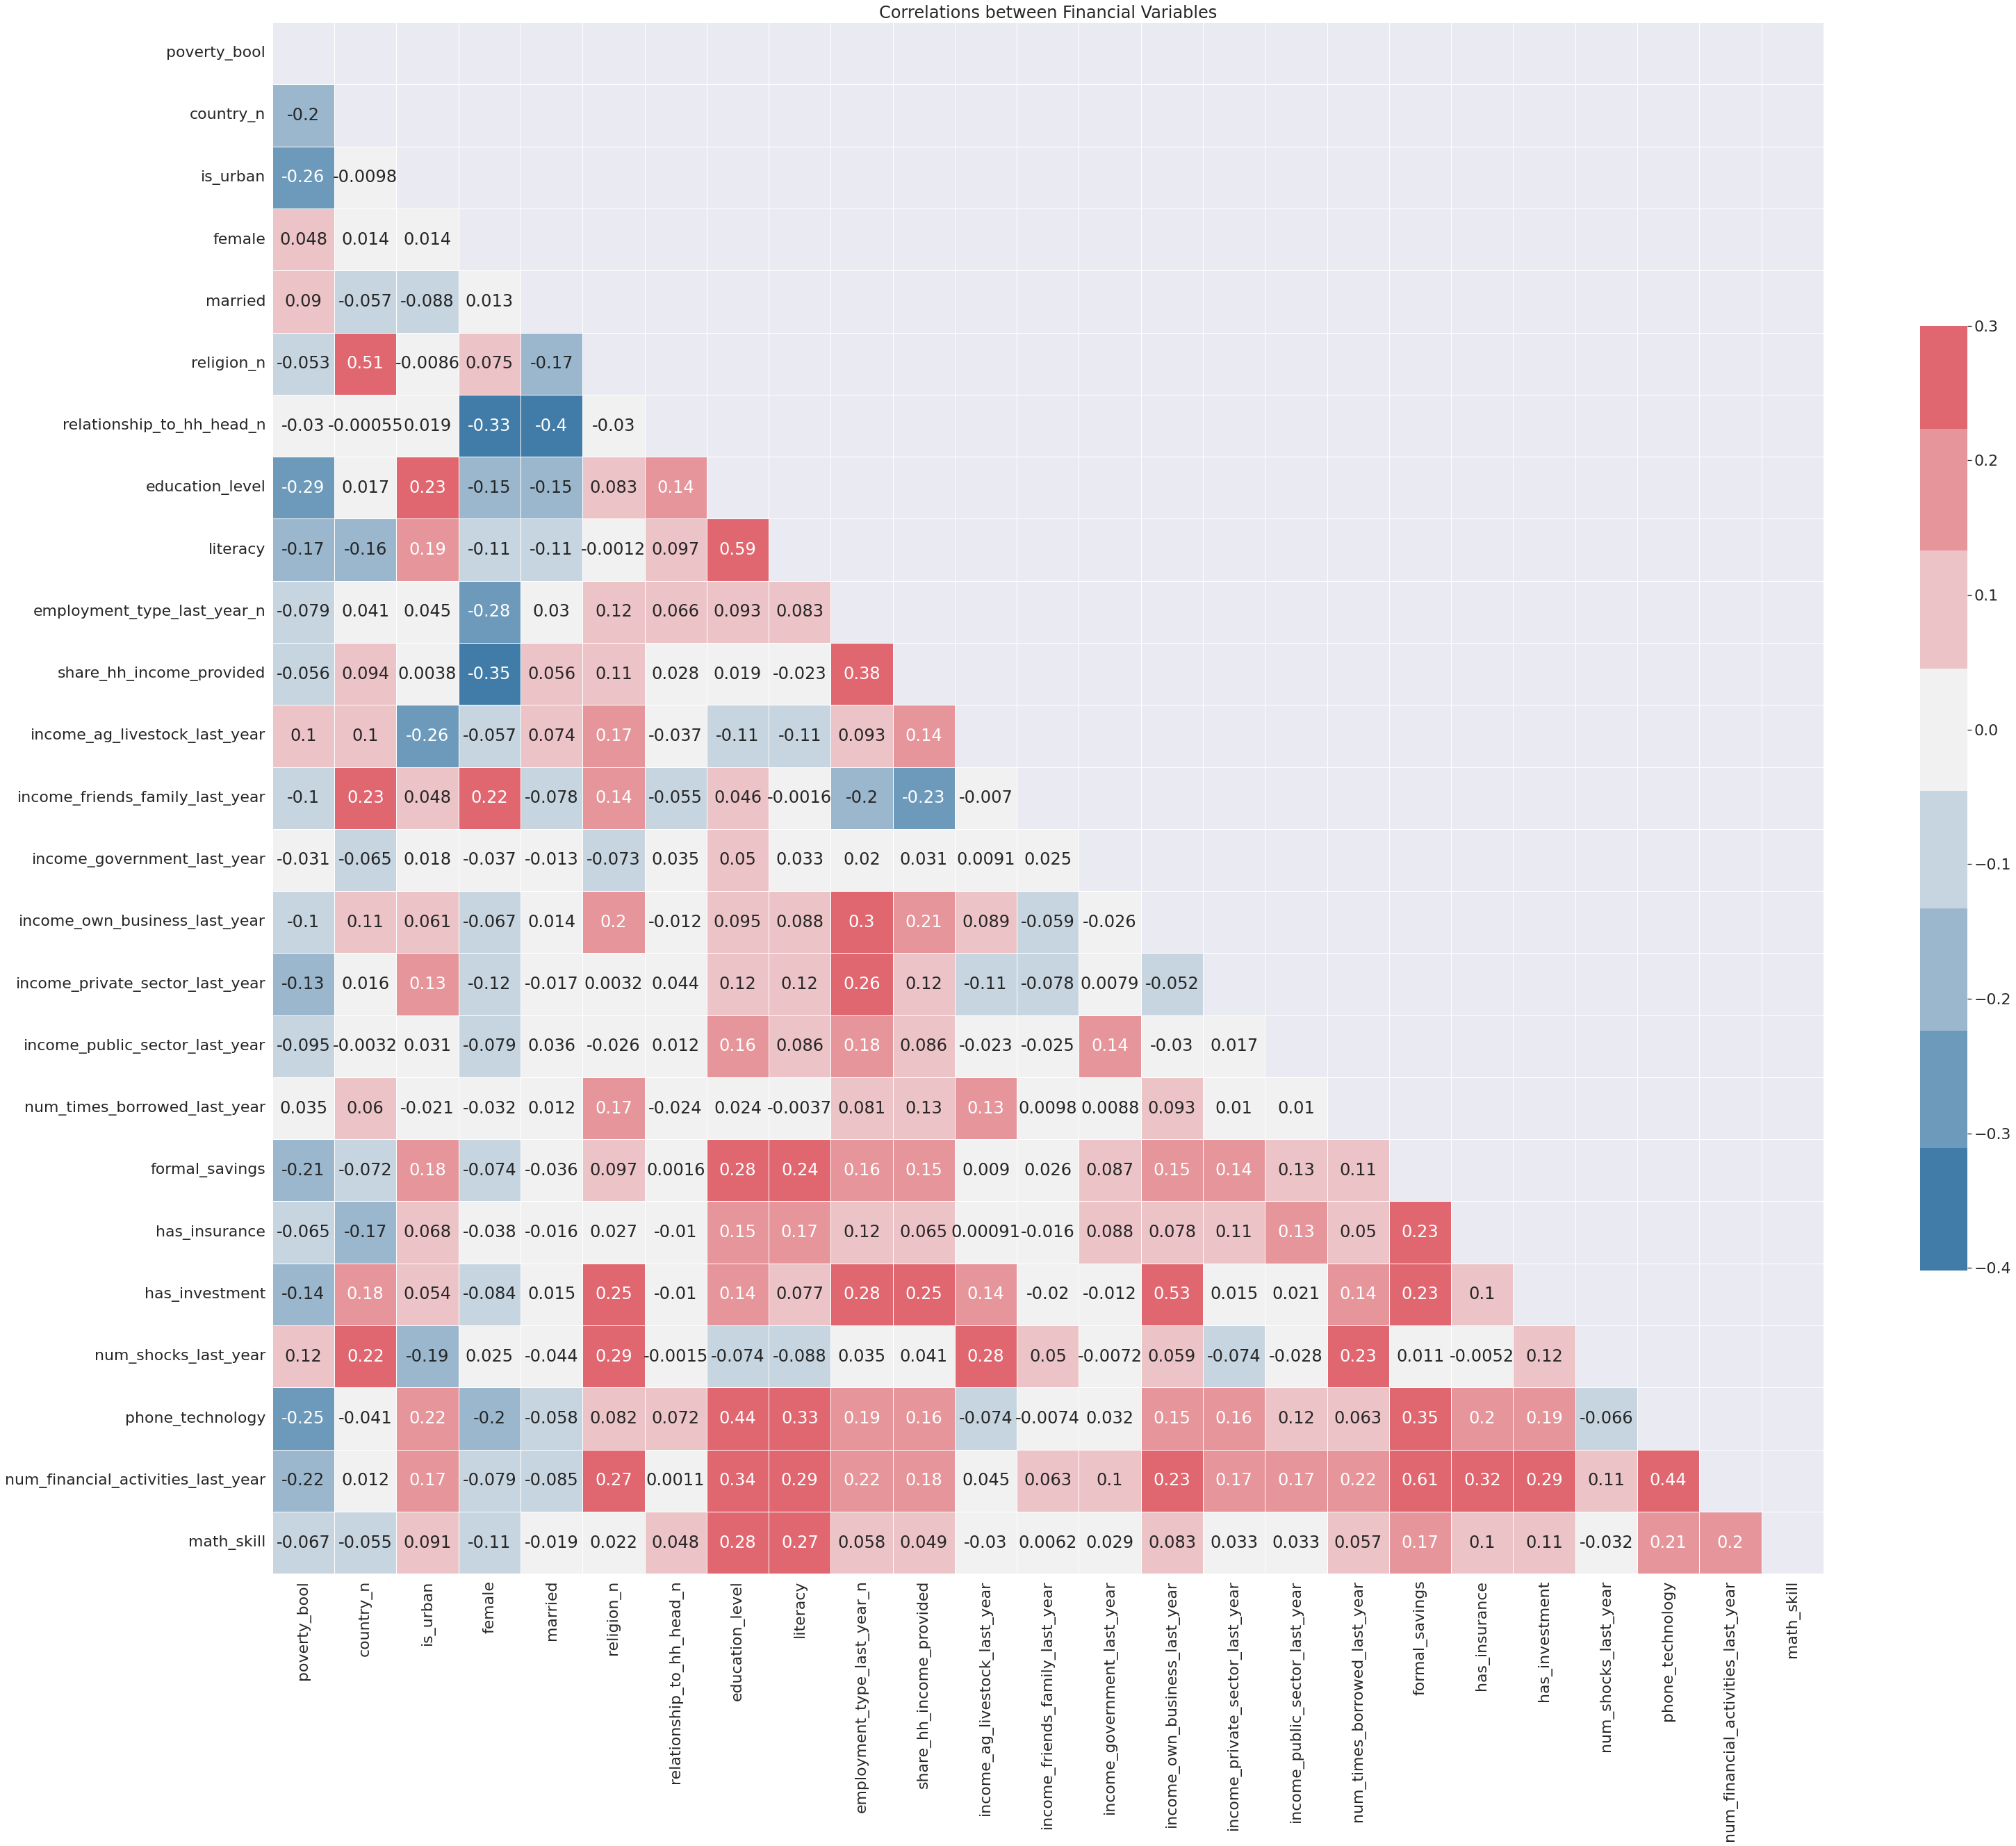

In [189]:
correlation= poverty.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
f, ax = plt.subplots(figsize=(50, 50))
cmap = sns.diverging_palette(240, 10, n=9)
fig9 = sns.heatmap(correlation, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlations between Financial Variables')
sns.set(font_scale=2)

In [190]:
female = poverty.groupby(["female"])[["female"]].count()
female["bool"] = female.index
married = poverty.groupby(["married"])[["married"]].count()
married["bool"] = married.index
urban = poverty.groupby(["is_urban"])[["is_urban"]].count()
urban["bool"] = urban.index
literacy = poverty.groupby(["literacy"])[["literacy"]].count()
literacy["bool"] = literacy.index
poverty_group = poverty.groupby(["poverty_bool"])[["poverty_bool"]].count()
poverty_group["bool"] = poverty_group.index

total = female.merge(married, left_on='bool', right_on='bool')
total = total.merge(urban, left_on='bool', right_on='bool')
total = total.merge(literacy, left_on='bool', right_on='bool')
total = total.merge(poverty_group, left_on='bool', right_on='bool')

total = pd.melt(total, id_vars =['bool'], value_vars =['female',"married","is_urban","literacy","poverty_bool"])

total = total.replace("female","Is Female")
total = total.replace("married","Is Married")
total = total.replace("is_urban","Is Urban")
total = total.replace("literacy","Is Literate")
total = total.replace("poverty_bool","Is Under Poverty Line")

total



,bool,variable,value
0,0,Is Female,5564
1,1,Is Female,7018
2,0,Is Married,4416
3,1,Is Married,8166
4,0,Is Urban,8451
5,1,Is Urban,4131
6,0,Is Literate,4859
7,1,Is Literate,7723
8,0,Is Under Poverty Line,4474
9,1,Is Under Poverty Line,8108


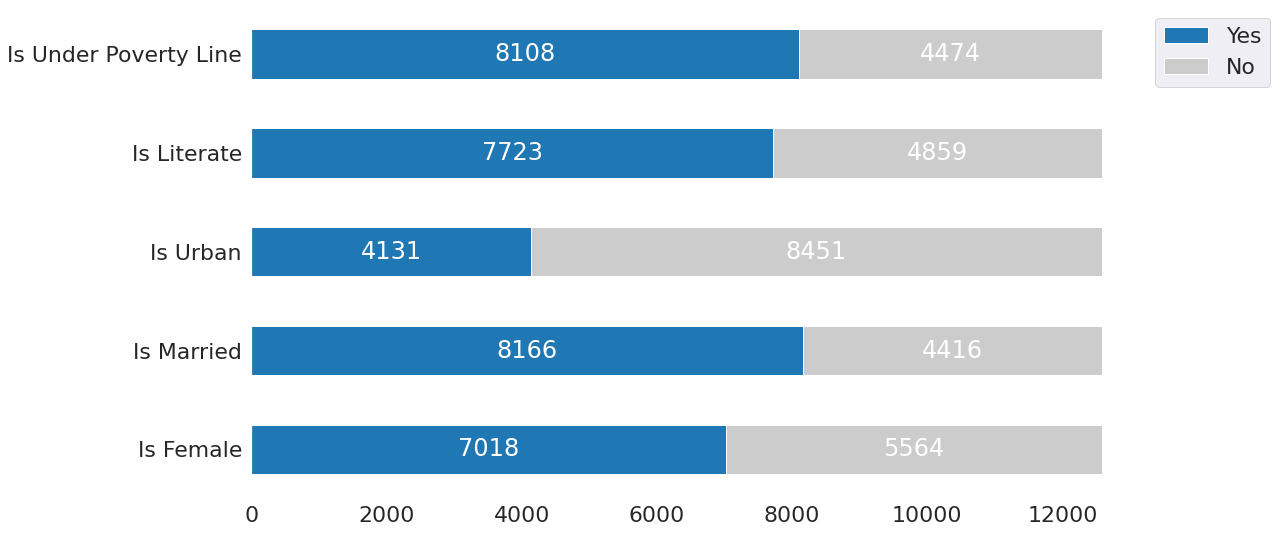

In [191]:
labels = pd.unique(total["variable"])

no_totals = total[total["bool"] == 0]["value"]
yes_totals = total[total["bool"] == 1]["value"]

fig, ax = plt.subplots()
width = 0.5

ax.set_facecolor('white')
p1 = ax.barh(labels, yes_totals, width, label = "Yes", color = "tab:blue")
p2 = ax.barh(labels, no_totals, width, label = "No", left = yes_totals, color = "0.8")
ax.bar_label(p1, label_type = "center", color = "white")
ax.bar_label(p2, label_type = "center", color = "white")
ax.legend(bbox_to_anchor=(1, 1))


plt.show()

In [157]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12582 entries, 0 to 12599
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   poverty_bool                        12582 non-null  int64  
 1   country                             12582 non-null  object 
 2   country_n                           12582 non-null  int64  
 3   is_urban                            12582 non-null  int64  
 4   age_groups                          12582 non-null  object 
 5   female                              12582 non-null  int64  
 6   married                             12582 non-null  int64  
 7   religion_clean                      12582 non-null  object 
 8   religion_n                          12582 non-null  int64  
 9   relationship_to_hh_head             12582 non-null  object 
 10  relationship_to_hh_head_n           12582 non-null  int64  
 11  education_level                     12346

<AxesSubplot:xlabel='Education Level', ylabel='literacy'>

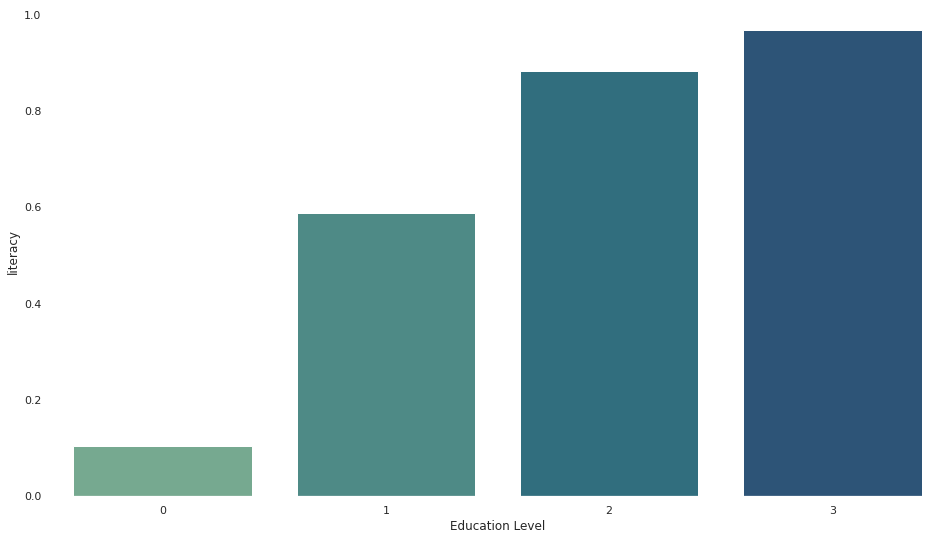

In [192]:
education = poverty.groupby(["education_level"])[["literacy"]].mean()
education["Education Level"] = education.index
education = education.astype({'Education Level':'int'})

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.color_palette("crest", as_cmap=True)
sns.barplot(data=education, x="Education Level", y="literacy", palette = "crest")


<AxesSubplot:xlabel='Age', ylabel='literacy'>

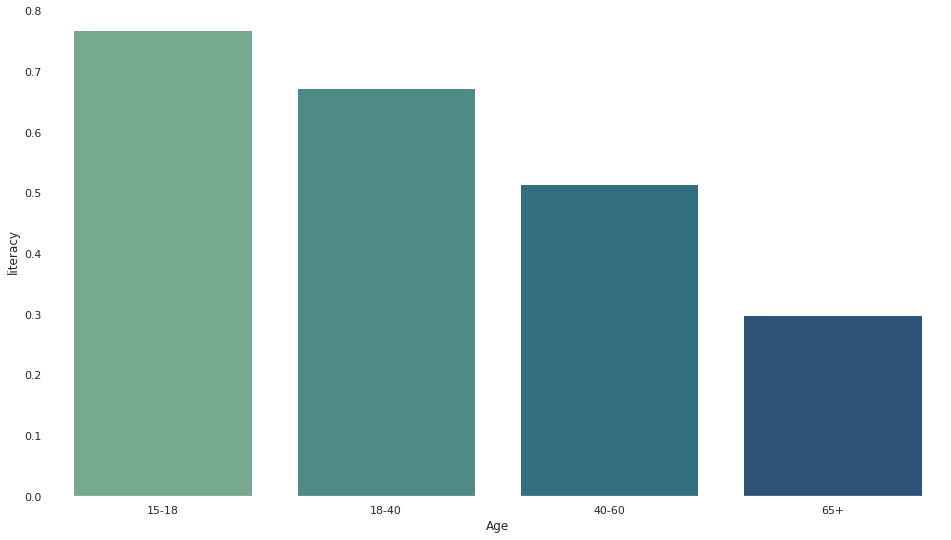

In [195]:
age = poverty.groupby(["age_groups"])[["literacy"]].mean()
age["Age"] = age.index
age

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.color_palette("crest", as_cmap=True)
sns.barplot(data=age, x="Age", y="literacy", palette = "crest")

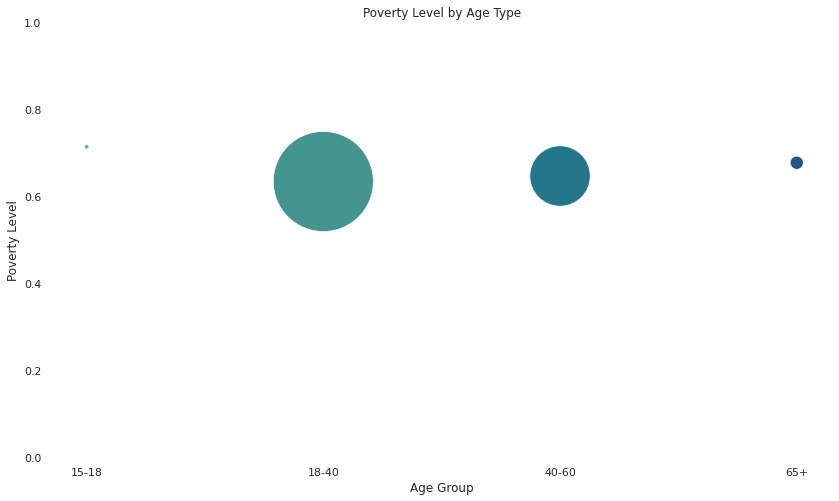

In [269]:
age_mean = poverty.groupby(["age_groups"])[["poverty_bool"]].mean()
age_mean["Age"] = age_mean.index
age

age_count = poverty.groupby(["age_groups"])[["age_groups"]].count()
age_count["Age"] = age_count.index
age_count


age = age_count.merge(age_mean, left_on='Age', right_on='Age')



fig = plt.figure(figsize = (14, 8))
ax = sns.scatterplot(data = age, x="Age", y="poverty_bool", size="age_groups", legend=False, sizes=(20, 10000),palette = "crest",hue = "Age")
ax.set(title='Poverty Level by Age Type')
ax.set(xlabel='Age Group', ylabel='Poverty Level')
plt.ylim(0, 1)
plt.show()

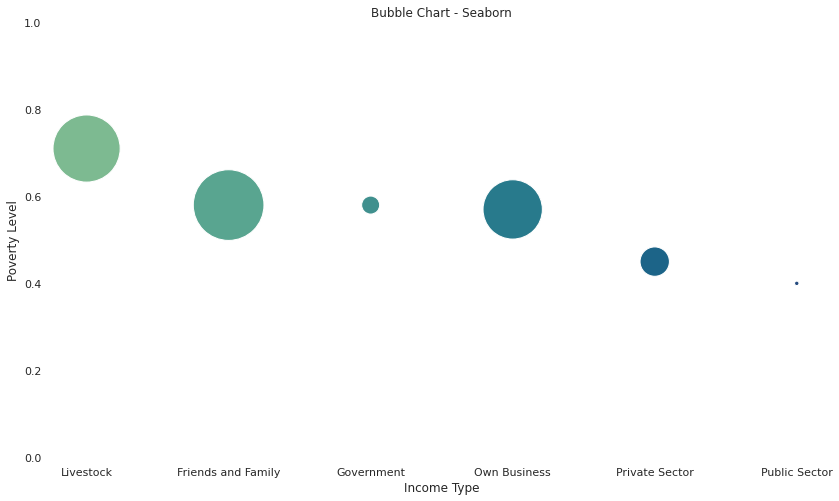

In [251]:
income = poverty[['income_ag_livestock_last_year', 'income_friends_family_last_year','income_government_last_year', 
                  'income_own_business_last_year','income_private_sector_last_year', 'income_public_sector_last_year',"poverty_bool"]]

income_values = [income["income_ag_livestock_last_year"].sum(),income["income_friends_family_last_year"].sum(),income["income_government_last_year"].sum(),
         income["income_own_business_last_year"].sum(),income["income_private_sector_last_year"].sum(),income["income_public_sector_last_year"].sum()]
labels = ["Livestock","Friends and Family","Government","Own Business","Private Sector","Public Sector"]

poverty_levels = [0.71,0.58,0.58,0.57,0.45,0.40]

#income.groupby(["income_public_sector_last_year"])[["poverty_bool"]].mean()

fig = plt.figure(figsize = (14, 8))
ax = sns.scatterplot(x=labels, y=poverty_levels, size=income_values, legend=False, sizes=(20, 5000),palette = "crest",hue = labels)
ax.set(title='Poverty Level by Income Type')
ax.set(xlabel='Income Type', ylabel='Poverty Level')
plt.ylim(0, 1)
plt.show()

<AxesSubplot:xlabel='math_skill', ylabel='Count'>

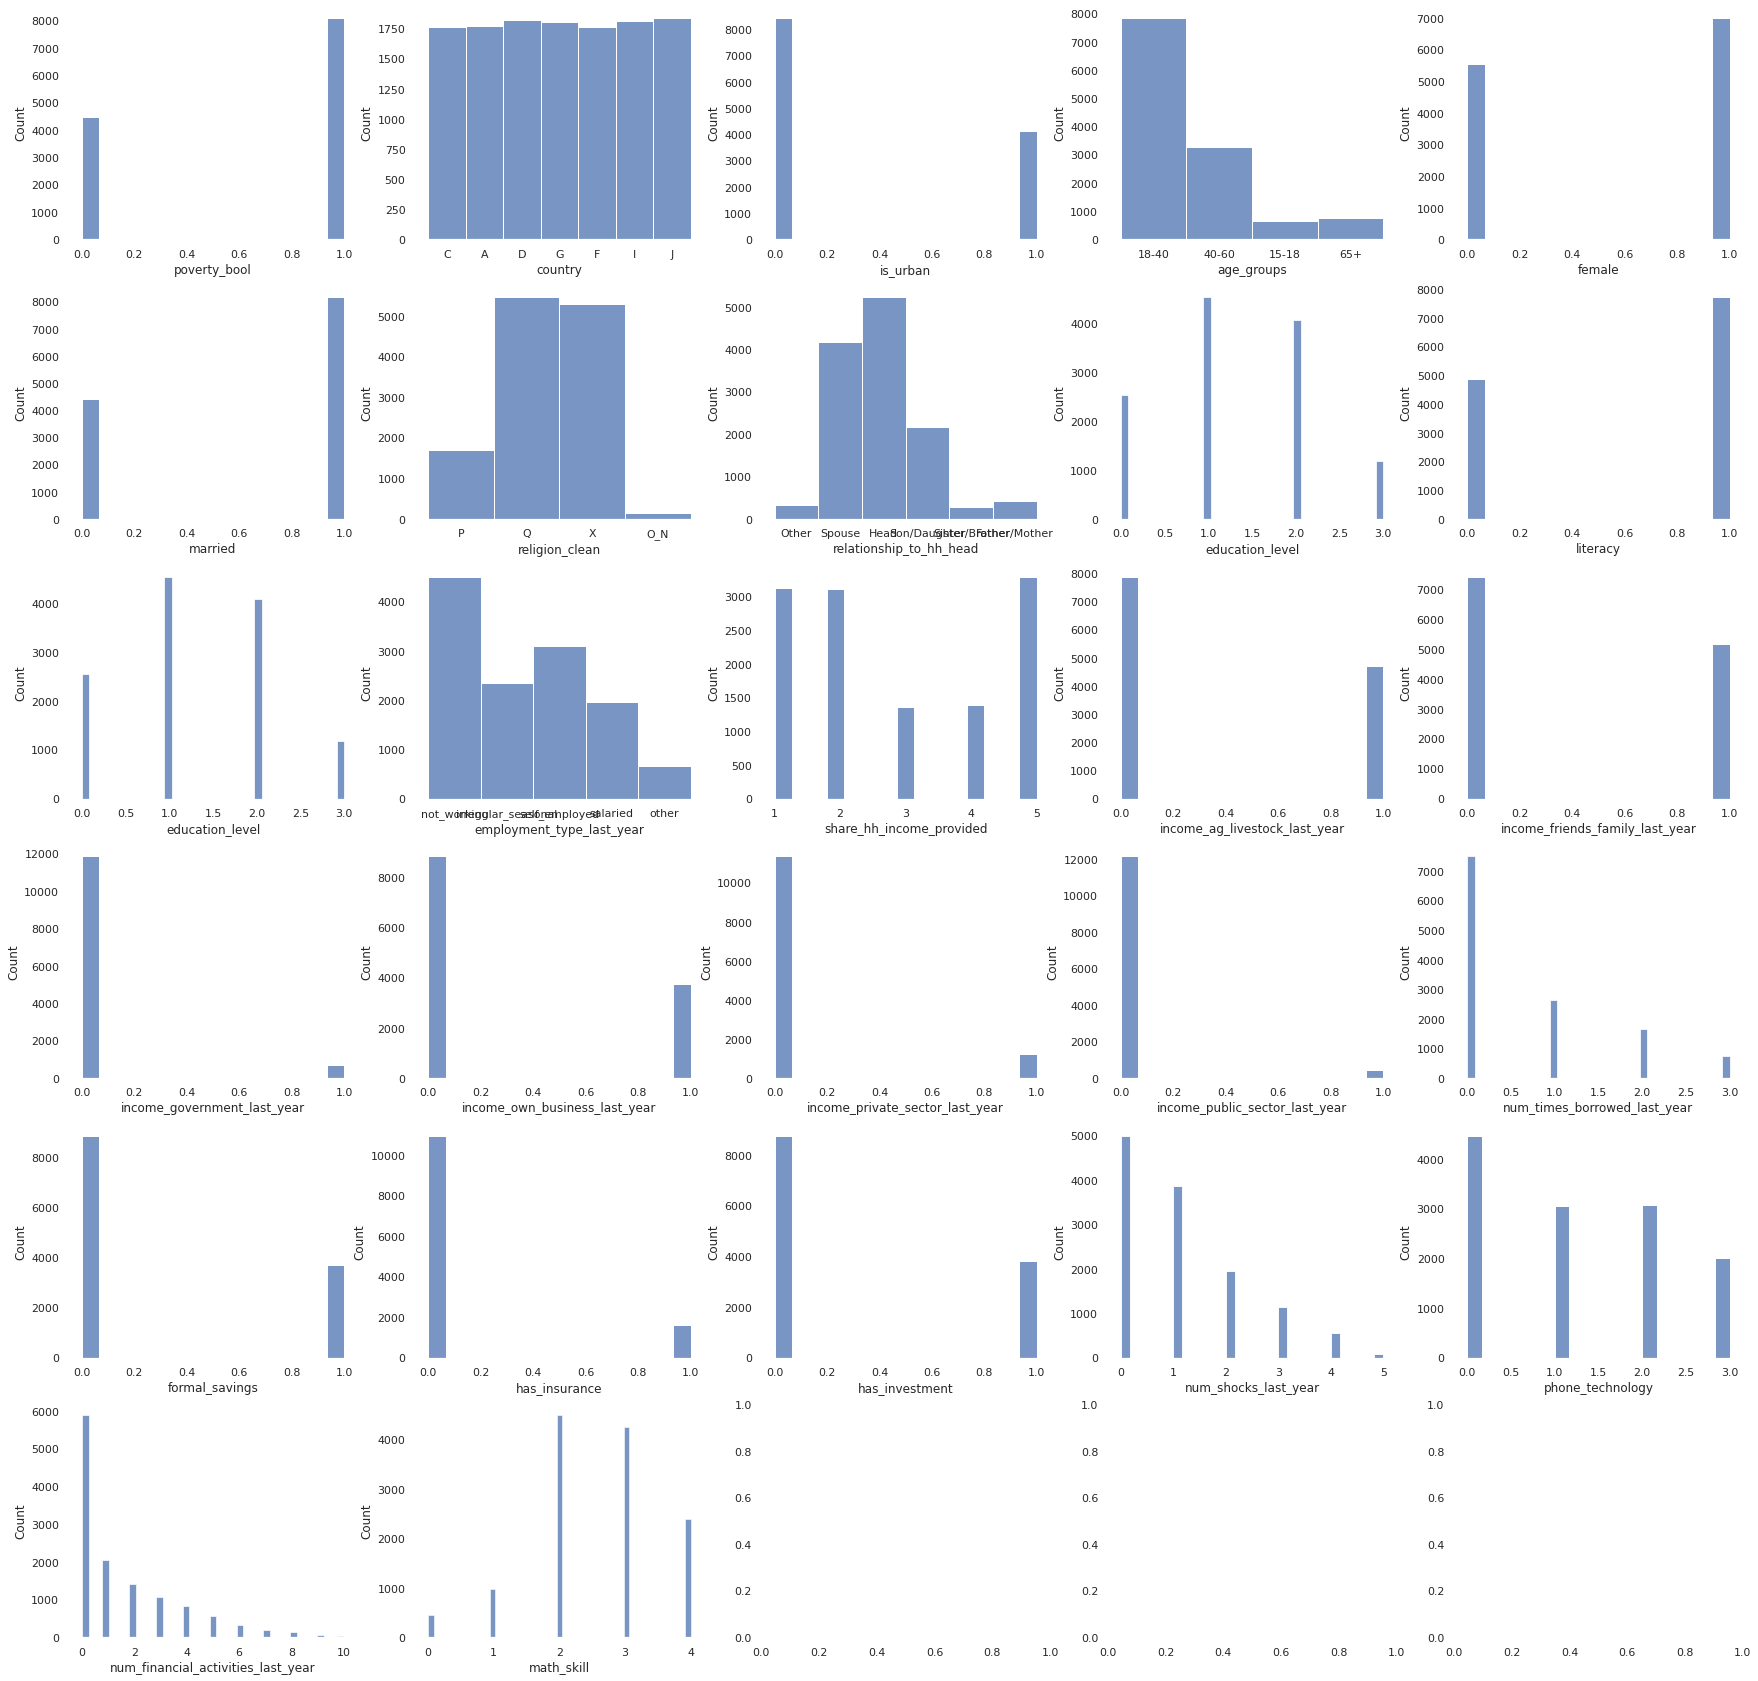

In [287]:
fig, axes = plt.subplots(6, 5, figsize=(30, 30))
sns.histplot(ax=axes[0,0],data=poverty, x="poverty_bool")
sns.histplot(ax=axes[0,1],data=poverty, x="country")
sns.histplot(ax=axes[0,2],data=poverty, x="is_urban")
sns.histplot(ax=axes[0,3],data=poverty, x="age_groups")
sns.histplot(ax=axes[0,4],data=poverty, x="female")
sns.histplot(ax=axes[1,0],data=poverty, x="married")
sns.histplot(ax=axes[1,1],data=poverty, x="religion_clean")
sns.histplot(ax=axes[1,2],data=poverty, x="relationship_to_hh_head")
sns.histplot(ax=axes[1,3],data=poverty, x="education_level")
sns.histplot(ax=axes[1,4],data=poverty, x="literacy")
sns.histplot(ax=axes[2,0],data=poverty, x="education_level")
sns.histplot(ax=axes[2,1],data=poverty, x="employment_type_last_year")
sns.histplot(ax=axes[2,2],data=poverty, x="share_hh_income_provided")
sns.histplot(ax=axes[2,3],data=poverty, x="income_ag_livestock_last_year")
sns.histplot(ax=axes[2,4],data=poverty, x="income_friends_family_last_year")
sns.histplot(ax=axes[3,0],data=poverty, x="income_government_last_year")
sns.histplot(ax=axes[3,1],data=poverty, x="income_own_business_last_year")
sns.histplot(ax=axes[3,2],data=poverty, x="income_private_sector_last_year")
sns.histplot(ax=axes[3,3],data=poverty, x="income_public_sector_last_year")
sns.histplot(ax=axes[3,4],data=poverty, x="num_times_borrowed_last_year")
sns.histplot(ax=axes[4,0],data=poverty, x="formal_savings")
sns.histplot(ax=axes[4,1],data=poverty, x="has_insurance")
sns.histplot(ax=axes[4,2],data=poverty, x="has_investment")
sns.histplot(ax=axes[4,3],data=poverty, x="num_shocks_last_year")
sns.histplot(ax=axes[4,4],data=poverty, x="phone_technology")
sns.histplot(ax=axes[5,0],data=poverty, x="num_financial_activities_last_year")
sns.histplot(ax=axes[5,1],data=poverty, x="math_skill")


# Modeling



In [316]:
poverty.columns

Index(['poverty_bool', 'country', 'country_n', 'is_urban', 'age_groups',
       'age_groups_n', 'female', 'married', 'religion_clean', 'religion_n',
       'relationship_to_hh_head', 'relationship_to_hh_head_n',
       'education_level', 'literacy', 'employment_type_last_year_n',
       'employment_type_last_year', 'share_hh_income_provided',
       'income_ag_livestock_last_year', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'formal_savings', 'has_insurance',
       'has_investment', 'num_shocks_last_year', 'phone_technology',
       'num_financial_activities_last_year', 'math_skill'],
      dtype='object')

In [331]:
X = poverty[['country_n', 'is_urban', 'age_groups_n',
       'female', 'married', 'religion_n','relationship_to_hh_head_n',
       'education_level', 'literacy', 'employment_type_last_year_n','share_hh_income_provided',
       'income_ag_livestock_last_year', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'formal_savings', 'has_insurance',
       'has_investment', 'num_shocks_last_year', 'phone_technology',
       'num_financial_activities_last_year', 'math_skill']].values
y = poverty['poverty_bool'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20,test_size=0.3,train_size=0.7)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=20,test_size=0.3,train_size=0.7)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# KNN

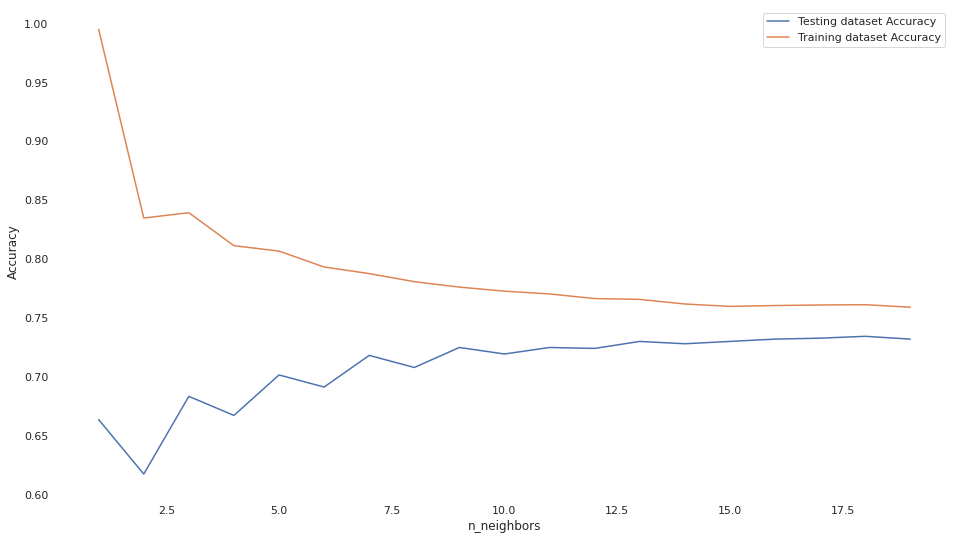

In [332]:
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	
	# Compute training and test data accuracy
	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [333]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

actual = y_test
predicted = y_pred

con_matrix = metrics.confusion_matrix(actual, predicted)
class_report = metrics.classification_report(y_test, y_pred)
print(con_matrix)
print(class_report)

[[ 465  446]
 [ 250 1369]]
              precision    recall  f1-score   support

           0       0.65      0.51      0.57       911
           1       0.75      0.85      0.80      1619

    accuracy                           0.72      2530
   macro avg       0.70      0.68      0.68      2530
weighted avg       0.72      0.72      0.72      2530



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


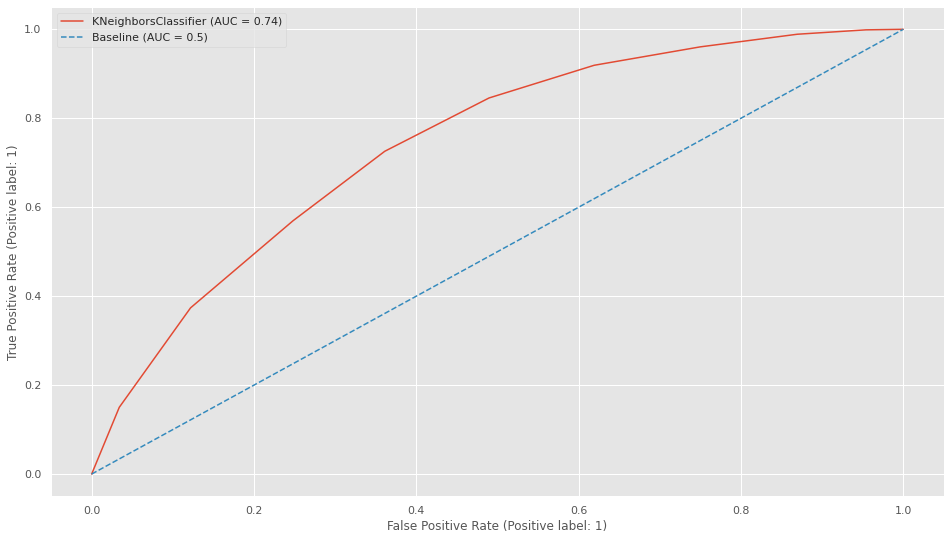

In [336]:
plot_roc_curve(knn, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

# Decision Tree

In [352]:
depth = 6

tree_clf = DecisionTreeClassifier(max_depth=depth)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

actual = y_test
predicted = y_pred

con_matrix = metrics.confusion_matrix(actual, predicted)
class_report = metrics.classification_report(y_test, y_pred)
print(con_matrix)
print(class_report)

[[ 456  455]
 [ 186 1433]]
              precision    recall  f1-score   support

           0       0.71      0.50      0.59       911
           1       0.76      0.89      0.82      1619

    accuracy                           0.75      2530
   macro avg       0.73      0.69      0.70      2530
weighted avg       0.74      0.75      0.73      2530



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


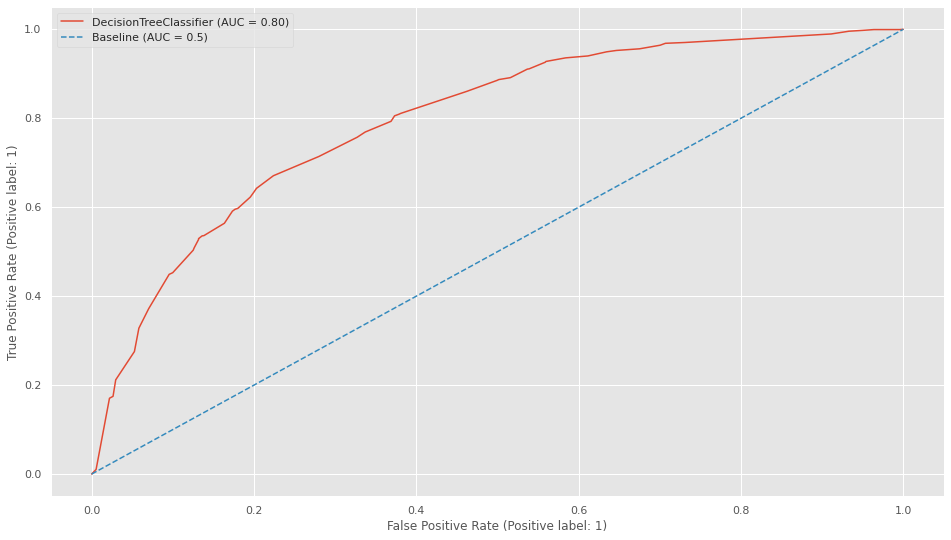

In [353]:
plot_roc_curve(tree_clf, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

# Random Forest

In [356]:
n = 2000

rndf_clf = RandomForestClassifier(n_estimators=n)
rndf_clf.fit(X_train, y_train)

y_pred = rndf_clf.predict(X_test)

actual = y_test
predicted = y_pred

con_matrix = metrics.confusion_matrix(actual, predicted)
class_report = metrics.classification_report(y_test, y_pred)
print(con_matrix)
print(class_report)

[[ 520  391]
 [ 201 1418]]
              precision    recall  f1-score   support

           0       0.72      0.57      0.64       911
           1       0.78      0.88      0.83      1619

    accuracy                           0.77      2530
   macro avg       0.75      0.72      0.73      2530
weighted avg       0.76      0.77      0.76      2530



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


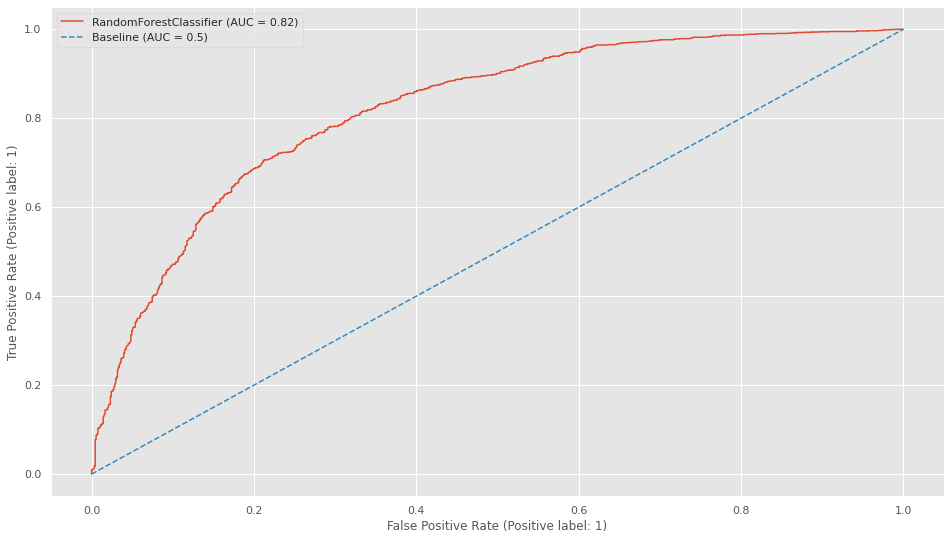

In [357]:
plot_roc_curve(rndf_clf, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

# Logit

In [358]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

actual = y_test
predicted = y_pred

con_matrix = metrics.confusion_matrix(actual, predicted)
class_report = metrics.classification_report(y_test, y_pred)
print(con_matrix)
print(class_report)

[[ 467  444]
 [ 208 1411]]
              precision    recall  f1-score   support

           0       0.69      0.51      0.59       911
           1       0.76      0.87      0.81      1619

    accuracy                           0.74      2530
   macro avg       0.73      0.69      0.70      2530
weighted avg       0.74      0.74      0.73      2530



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


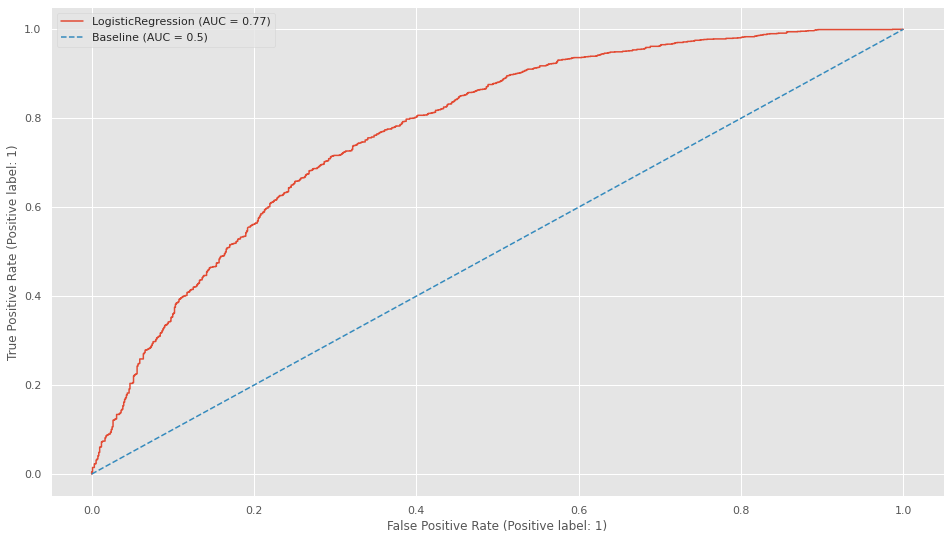

In [359]:
plot_roc_curve(log_reg, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

In [360]:
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100,500]
space['class_weight']=["balanced","unbalanced"]
space['tol']= [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100,500]
space['warm_start']= [True,False]
space['fit_intercept']= [True,False]
search = GridSearchCV(log_reg , space, scoring='accuracy')

In [ ]:
result = search.fit(X_train, y_train)

In [362]:
print('Best Score: %s' % result.best_score_)
print('Mejores hiperparametros: %s' % result.best_params_)

Best Score: 0.7526970954356846
Mejores hiperparametros: {'C': 0.1, 'class_weight': 'unbalanced', 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 10, 'warm_start': True}


In [363]:
log_reg = LogisticRegression(C= 0.1, class_weight= "unbalanced", fit_intercept= True, penalty= "l2", solver= 'newton-cg', tol= 10, warm_start= True)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_train)

actual = y_train
predicted = y_pred

con_matrix = metrics.confusion_matrix(actual, predicted)
class_report = metrics.classification_report(y_train, y_pred)
print(con_matrix)
print(class_report)

[[1542 1452]
 [ 621 4820]]
              precision    recall  f1-score   support

           0       0.71      0.52      0.60      2994
           1       0.77      0.89      0.82      5441

    accuracy                           0.75      8435
   macro avg       0.74      0.70      0.71      8435
weighted avg       0.75      0.75      0.74      8435



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


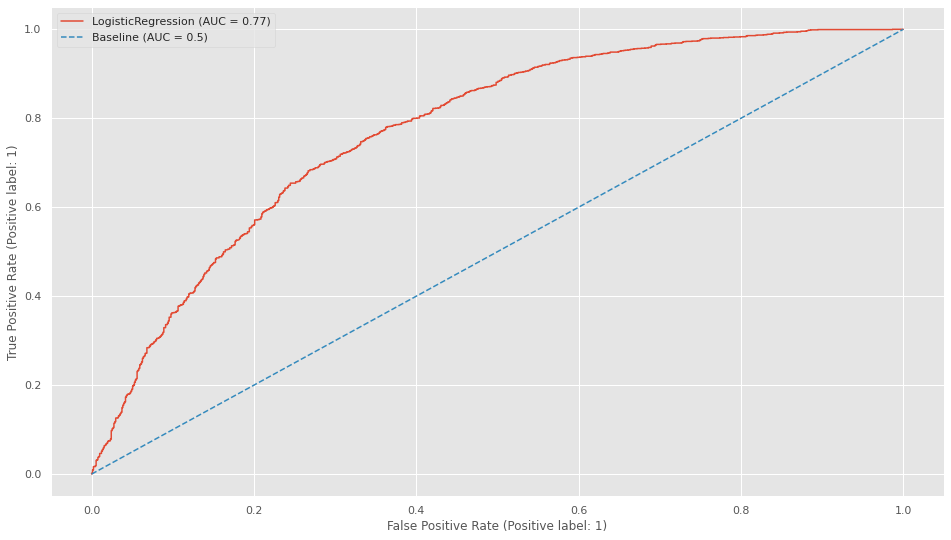

In [364]:
plot_roc_curve(log_reg, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();